In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [4]:
# Load the California Housing dataset
california = fetch_california_housing()

# Convert the dataset to a DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target  # Target variable (median house value)

# Display the first 5 rows
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


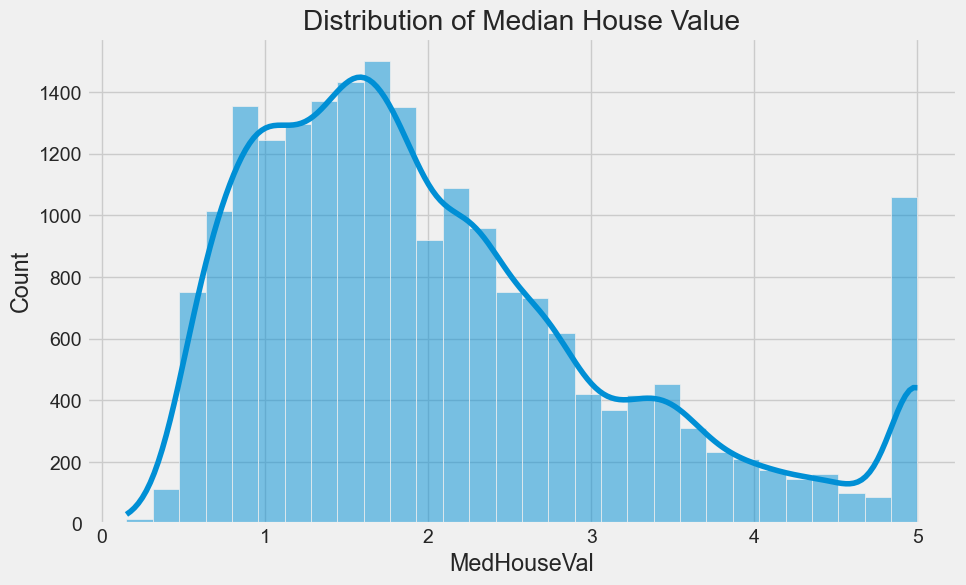

In [5]:
# Display basic statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Plot the distribution of the target variable (MedHouseVal)
plt.figure(figsize=(10,6))
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.show()


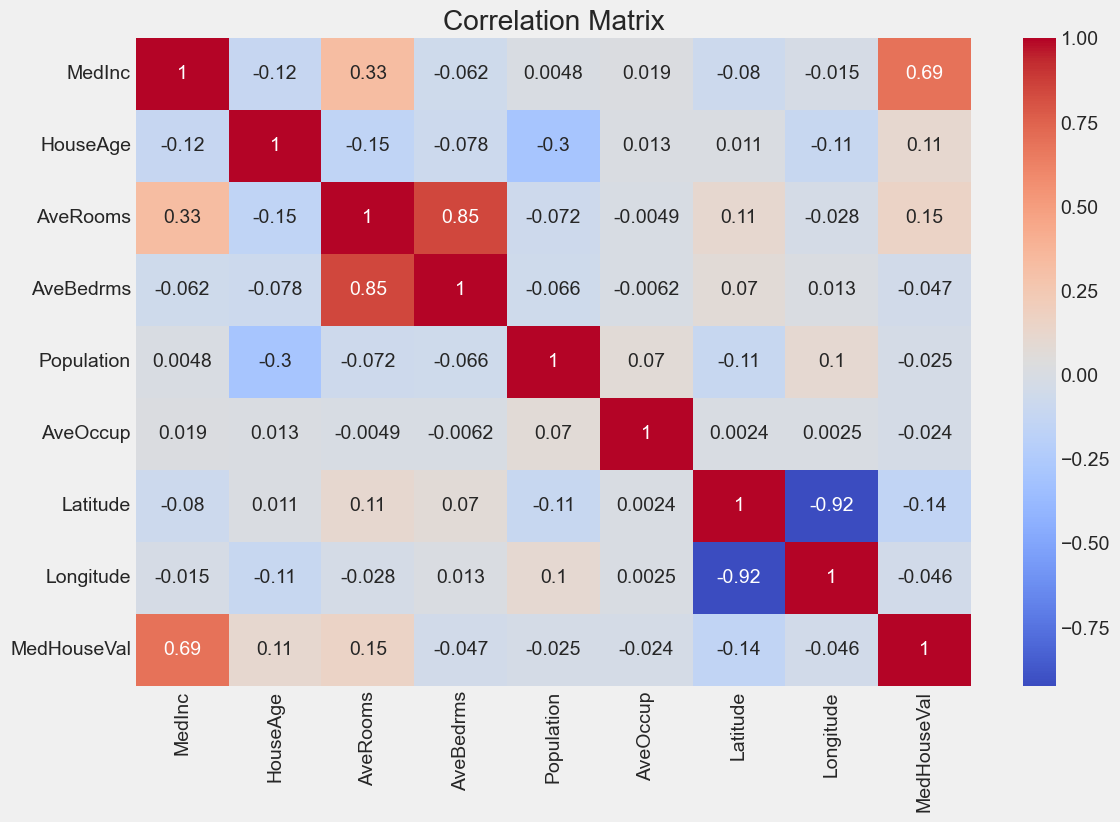

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
Latitude       0.144160
HouseAge       0.105623
AveBedrms      0.046701
Longitude      0.045967
Population     0.024650
AveOccup       0.023737
Name: MedHouseVal, dtype: float64


In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Selecting features with strong correlation to MedHouseVal (target)
strong_corr = corr_matrix['MedHouseVal'].abs().sort_values(ascending=False)
print(strong_corr)


In [7]:
# Select features that are most correlated with the target
features = ['MedInc', 'AveRooms', 'HouseAge']  # Median income, average rooms, house age
X = data[features]
y = data['MedHouseVal']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train/test splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 3), (4128, 3), (16512,), (4128,))

In [8]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Coefficients: \n", model.coef_)
print("Intercept: ", model.intercept_)


Coefficients: 
 [ 0.4447578  -0.02814968  0.01683623]
Intercept:  0.01729564528337546


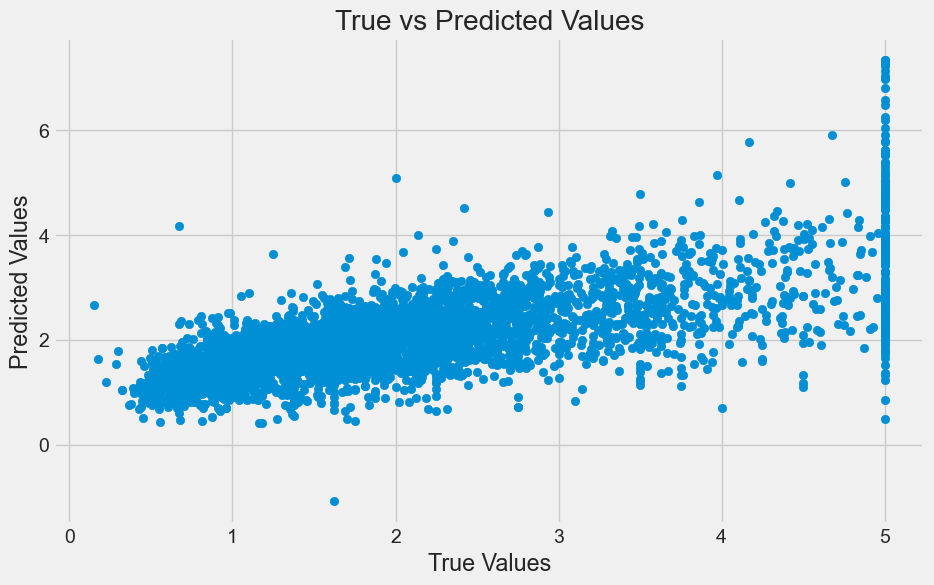

In [9]:
# Make predictions using the test set
y_pred = model.predict(X_test)

# Plot true vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


In [10]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.6589108649336337
R-squared: 0.49717158850807075


In [11]:
# Display coefficients for each feature
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


          Coefficient
MedInc       0.444758
AveRooms    -0.028150
HouseAge     0.016836
